## <center>The Sparks Foundation</center>
### <center>TASK #4 - Exploratory Data Analysis - Terrorism</center>
### <center>Domain : Data Science and Business Analytics</center>
### <center>Author : Akshay Pandurang Paunikar</center>

#### Objective:
    1. Perform Exploratory Data Analysis on dataset Global Terrorism.
    2. As a security/defense analyst, try to find out the hot zone of terrorism.
    3. What all security issues and insights you can derive by EDA.

In [133]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [134]:
# Set working directory
import io
%cd "E:\TSF-INTERN\TSF-INTERN Tasks\Task#4"

E:\TSF-INTERN\TSF-INTERN Tasks\Task#4


In [135]:
# Load the data
data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1',low_memory=False)

In [136]:
# Check dimensions of data
data.shape

(181691, 135)

There are 181691 rows and 135 columns in our data.

In [137]:
# Check first 5 records from data
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [138]:
# Check for null values
pd.options.display.max_rows = 200
data.isnull().sum().sort_values(ascending=False)

gsubname3             181671
weapsubtype4_txt      181621
weapsubtype4          181621
weaptype4             181618
weaptype4_txt         181618
claimmode3            181558
claimmode3_txt        181558
gsubname2             181531
claim3                181373
guncertain3           181371
gname3                181367
divert                181367
attacktype3           181263
attacktype3_txt       181263
ransomnote            181177
ransompaidus          181139
ransomamtus           181128
claimmode2            181075
claimmode2_txt        181075
ransompaid            180917
corp3                 180665
targsubtype3          180594
targsubtype3_txt      180594
natlty3_txt           180544
natlty3               180544
target3               180516
targtype3             180515
targtype3_txt         180515
ransomamt             180341
weapsubtype3_txt      179998
weapsubtype3          179998
weaptype3_txt         179828
weaptype3             179828
claim2                179801
guncertain2   

Here we can see that there are so many columns with null/missing values and we will select only those columns which are necessary for our analysis.

In [139]:
# Select columns that are necessary for our analysis
data = data[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
           'targtype1_txt','gname','weaptype1_txt','nkill','nwound']]

In [140]:
# Renaming the columns for ease of understanding
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                     'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide',
                     'attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type','gname':'Attack_Group',
                     'weaptype1_txt':'Weapon','nkill':'Killed','nwound':'Wounded'},inplace=True)

In [141]:
# Check for null/missing values in the new data.
data.isnull().sum()

Year                0
Month               0
Day                 0
Extended            0
Country             0
Region              0
City              434
Success             0
Suicide             0
Attack_Type         0
Target_Type         0
Attack_Group        0
Weapon              0
Killed          10313
Wounded         16311
dtype: int64

In [142]:
# Replacing the null values in our data
data.City.fillna('Unknown',inplace=True)
data.Killed.fillna(0,inplace=True)
data.Wounded.fillna(0,inplace=True)

Now we will create a column "Collateral" which will show the combined result of how many people were killed and injured.

In [143]:
data['Collateral'] = data['Killed']+data['Wounded']

In [144]:
# Dropping the original columns
data = data.drop(['Killed','Wounded'],axis=1)

In [145]:
# Month 0 does not make any sense so we will replace it by 1 and same apllied for day 0
data.Month.replace(to_replace=0,value=1,inplace=True)
data.Day.replace(to_replace=0,value=1,inplace=True)

In [146]:
# Check first 5 records from our new data
data.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Attack_Group,Weapon,Collateral
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,1,1,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,1,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,1,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0
4,1970,1,1,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0


In [147]:
# Here we will save the csv file to local drive so that we can use it for Tableau
#data.to_csv('Global Terrorism.csv')

#### Data Dictionary.
1. Year : This field contains the year in which the incident occurred.
2. Month : This field contains the number of the month in which the incident occurred.
3. Day : This field contains the numeric day of the month on which the incident occurred.
4. Extended : 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less
5. Country : This field identifies the country or location where the incident occurred.
6. Region : This field identifies the region in which the incident occurred.
7. City : Name of the city, village, or town in which the incident occurred.
8. Success : Success of a terrorist strike.
9. Suicide : 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide.
10. Attack_Type : The general method of attack and broad class of tactics used.
11. Target_Type : The general type of target/victim.
12. Attack_Group : The name of the group that carried out the attack.
13. Weapon : General type of weapon used in the incident.
14. Collateral : Collateral damage is any death, injury, or other damage inflicted that is an incidental result of an activity.

In [148]:
# Check dimensions of new data
data.shape

(181691, 14)

In [149]:
# Check for any null/missing values
data.isnull().sum()

Year            0
Month           0
Day             0
Extended        0
Country         0
Region          0
City            0
Success         0
Suicide         0
Attack_Type     0
Target_Type     0
Attack_Group    0
Weapon          0
Collateral      0
dtype: int64

In [150]:
# Datatypes present in our data
data.dtypes

Year              int64
Month             int64
Day               int64
Extended          int64
Country          object
Region           object
City             object
Success           int64
Suicide           int64
Attack_Type      object
Target_Type      object
Attack_Group     object
Weapon           object
Collateral      float64
dtype: object

In [151]:
# Concise summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          181691 non-null  int64  
 1   Month         181691 non-null  int64  
 2   Day           181691 non-null  int64  
 3   Extended      181691 non-null  int64  
 4   Country       181691 non-null  object 
 5   Region        181691 non-null  object 
 6   City          181691 non-null  object 
 7   Success       181691 non-null  int64  
 8   Suicide       181691 non-null  int64  
 9   Attack_Type   181691 non-null  object 
 10  Target_Type   181691 non-null  object 
 11  Attack_Group  181691 non-null  object 
 12  Weapon        181691 non-null  object 
 13  Collateral    181691 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 19.4+ MB


In [152]:
# Descriptive statistics
data.describe()

,Year,Month,Day,Extended,Success,Suicide,Collateral
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467387,15.510548,0.045346,0.889598,0.036507,5.150156
std,13.259430,3.388110,8.805691,0.208063,0.313391,0.187549,40.555416
min,1970.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,4.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,9574.000000


### How many attacks happened in each year worldwide? which year recorded maximum attacks?

In [153]:
# Total number of attacks yearwise
data.Year.value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

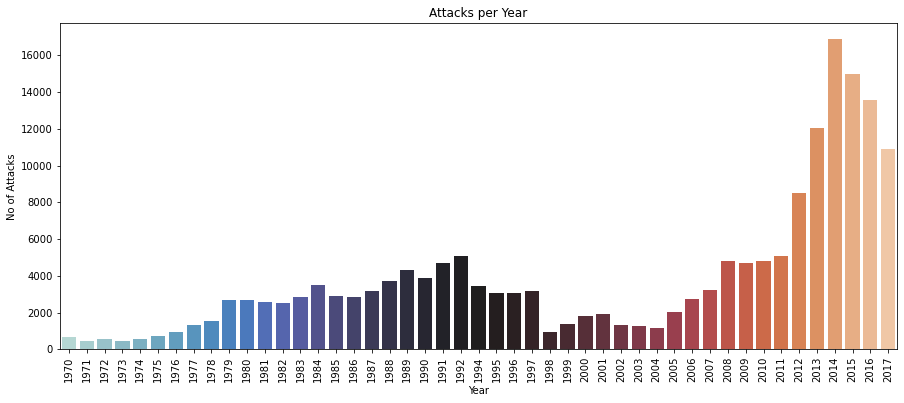

In [154]:
# Attacks per Year
plt.figure(figsize=(15,6))
sns.countplot(x='Year',data=data,palette='icefire',dodge=False)
plt.ylabel('No of Attacks')
plt.title('Attacks per Year')
plt.xticks(rotation=90)
plt.show()

From above analysis we can see that <b>Year - 2014</b> has recorded maximum <b>Attacks - 16903</b>.

### Which month has recorded maximum attacks overall ?

In [155]:
# Number of attacks by month
data.Month.value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14956
11    14906
9     14180
2     13879
12    13496
Name: Month, dtype: int64

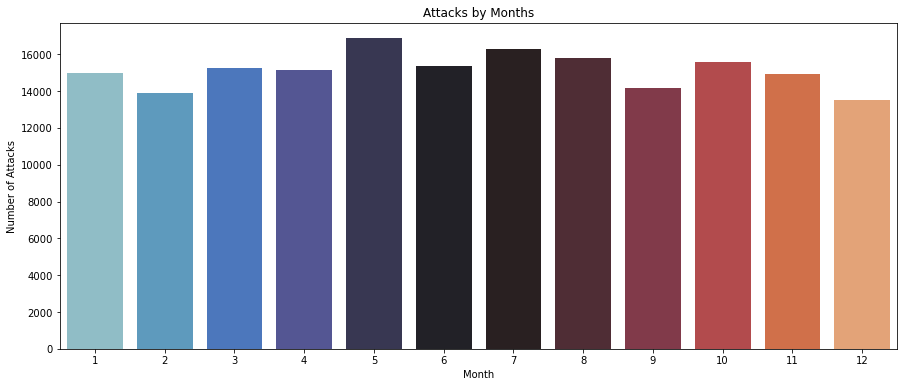

In [156]:
# Attacks by Month
plt.figure(figsize=(15,6))
sns.countplot(x='Month',data=data,palette='icefire',dodge=False)
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.title('Attacks by Months')
plt.show()

From above analysis we can see that <b>Month - May</b> has recorded maximum <b>Attacks - 16875</b>.

In [157]:
# Number of attacks according to Day of the Month
data.Day.value_counts()

1     7235
15    6500
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
Name: Day, dtype: int64

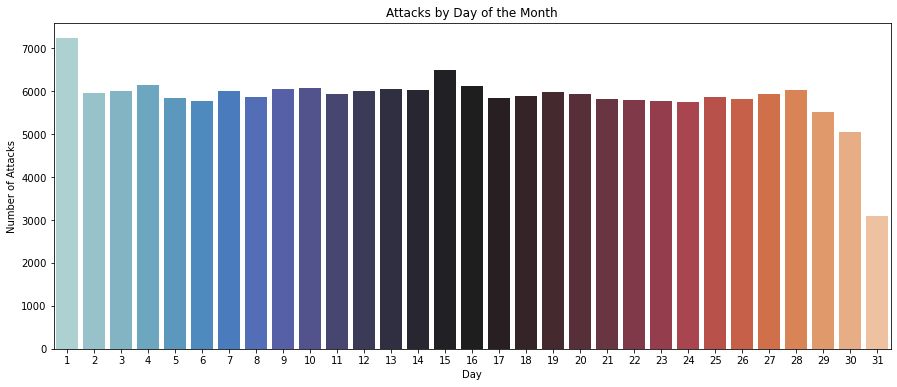

In [158]:
# Attacks by Day of the Month
plt.figure(figsize=(15,6))
sns.countplot(x='Day',data=data,palette='icefire',dodge=False)
plt.xlabel('Day')
plt.ylabel('Number of Attacks')
plt.title('Attacks by Day of the Month')
plt.show()

The maximum <b>Attacks</b> happened on <b>1<sup>st</sup></b> and <b>15<sup>th</sup></b> day of the <b>Month.</b>

### How many attacks were successful / unsuccessful? How many of these attacks were suicide attacks? How many attacks extended for more than 24 Hrs ?

In [159]:
# Successful/Unsuccessful attack counts
data.Success.value_counts()

1    161632
0     20059
Name: Success, dtype: int64

In [160]:
# Suicide/Non-Suicide attack counts
data.Suicide.value_counts()

0    175058
1      6633
Name: Suicide, dtype: int64

In [161]:
# Extende/Non-extended attack counts
data.Extended.value_counts()

0    173452
1      8239
Name: Extended, dtype: int64

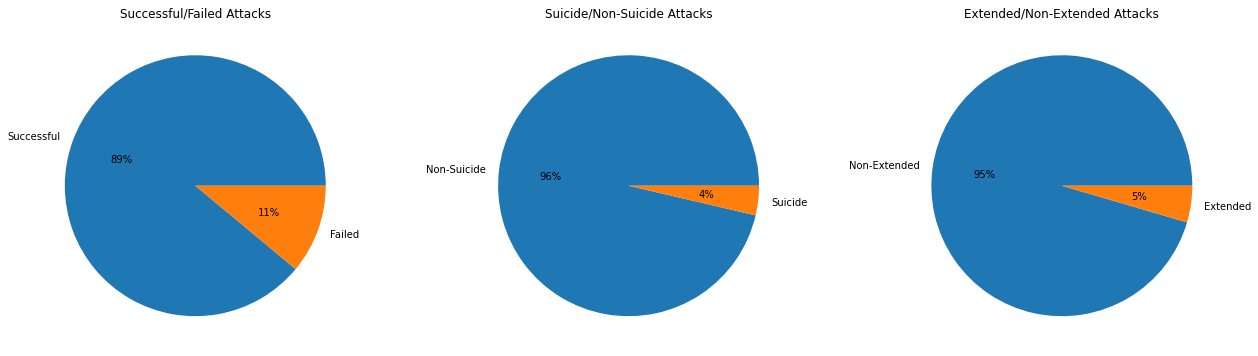

In [162]:
# Now let's plot above analysis in a pie chart
plt.figure(figsize=(22,6))

# Successful/Failed Attacks
plt.subplot(1,3,1)
plt.pie(x=data.Success.value_counts(),labels=['Successful','Failed'],autopct = '%0.0f%%')
plt.title('Successful/Failed Attacks')

# Suicide/Non-Suicide Attacks
plt.subplot(1,3,2)
plt.pie(x=data.Suicide.value_counts(),labels=['Non-Suicide','Suicide'],autopct = '%0.0f%%')
plt.title('Suicide/Non-Suicide Attacks')

# Extended/Non-Extended Attacks
plt.subplot(1,3,3)
plt.pie(x=data.Extended.value_counts(),labels=['Non-Extended','Extended'],autopct = '%0.0f%%')
plt.title('Extended/Non-Extended Attacks')

plt.show()

From above analysis we can see that there were total of <b>161632 - 89% - Successful Attacks</b> and <b>20059 - 11% - Failed Attacks.</b> Out of all the attacks that were happened only <b>6633 - 4%</b> were <b>Suicide Attacks</b> and only <b>8239 - 5% Extended</b> for more than 24 Hrs.

### Which are the Top-10 countries with maximum attacks ? How many Attacks were Successful/Unsuccessful ? How many of them were Suicide Attacks ?

In [163]:
# Top 10 Countries with maximum attacks
top10_country = data.Country.value_counts().sort_values(ascending=False).head(10)
top10_country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

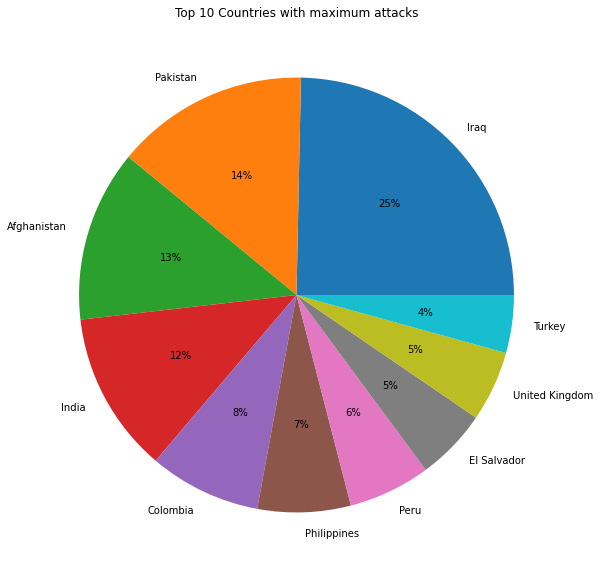

In [164]:
# Top 10 Countries with maximum attacks
plt.figure(figsize=(15,10))
plt.pie(x=top10_country,labels=top10_country.index,autopct='%.f%%')
plt.title('Top 10 Countries with maximum attacks')
plt.show()

Now we will filter the data according to top 10 countries with maximum attacks.

In [165]:
Top10_Country_Data = data[data['Country'].isin(top10_country.index)]

In [166]:
# Successful/Unsuccessful attacks on top 10 countries
Top10_Country_Data.groupby(['Country'])['Success'].value_counts()

Country         Success
Afghanistan     1          11141
                0           1590
Colombia        1           7712
                0            594
El Salvador     1           5227
                0             93
India           1          10280
                0           1680
Iraq            1          21861
                0           2775
Pakistan        1          12600
                0           1768
Peru            1           5755
                0            341
Philippines     1           5975
                0            933
Turkey          1           3909
                0            383
United Kingdom  1           4206
                0           1029
Name: Success, dtype: int64

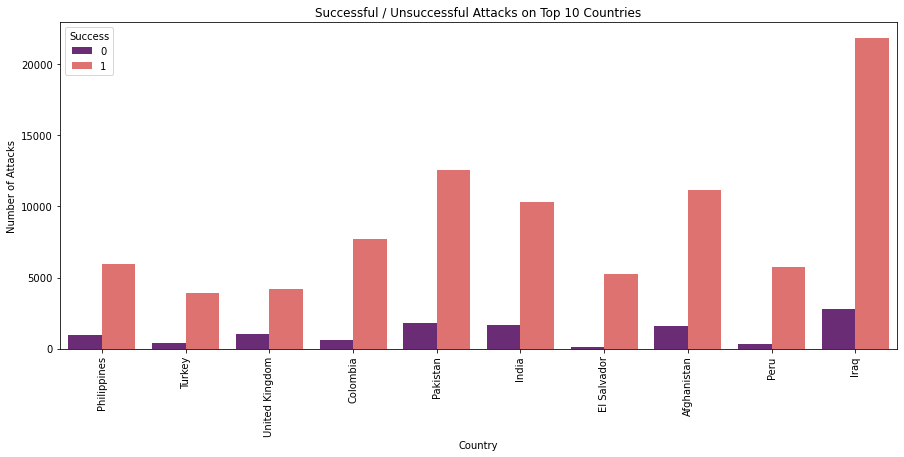

In [167]:
# Successful / Unsuccessful Attacks on Top 10 Countries
plt.figure(figsize=(15,6))
sns.countplot(x='Country',data=Top10_Country_Data,hue='Success',palette='magma')
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks')
plt.title('Successful / Unsuccessful Attacks on Top 10 Countries')
plt.show()

In [168]:
# Suicidal/Non-Suicidal Attacks on top 10 countries
Top10_Country_Data.groupby(['Country'])['Suicide'].value_counts()

Country         Suicide
Afghanistan     0          11503
                1           1228
Colombia        0           8302
                1              4
El Salvador     0           5320
India           0          11900
                1             60
Iraq            0          22034
                1           2602
Pakistan        0          13857
                1            511
Peru            0           6096
Philippines     0           6899
                1              9
Turkey          0           4216
                1             76
United Kingdom  0           5228
                1              7
Name: Suicide, dtype: int64

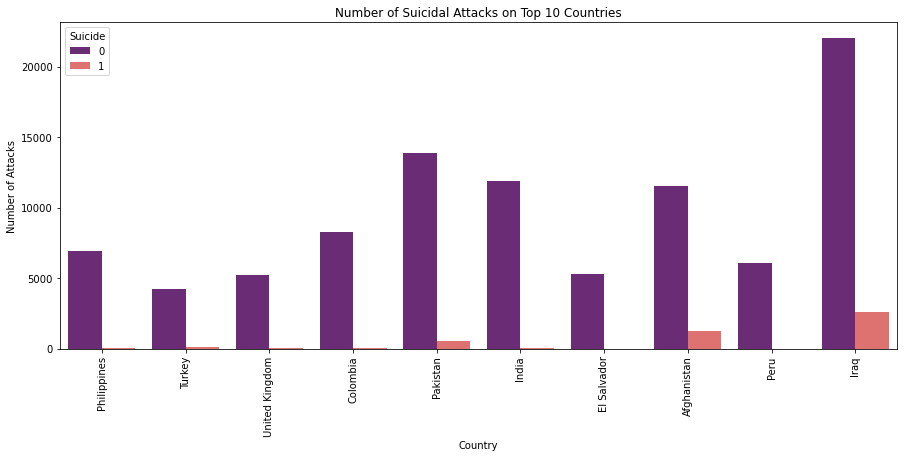

In [169]:
# Number of Suicidal Attacks on Top 10 Countries
plt.figure(figsize=(15,6))
sns.countplot(x='Country',data=Top10_Country_Data,hue='Suicide',palette='magma')
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks')
plt.title('Number of Suicidal Attacks on Top 10 Countries')
plt.show()

From above analysis we can say that the maximum <b>Attacks</b> happened in the <b>Country- Iraq</b> with <b>21861 - Successful</b> and <b>2775 - Unsuccessful Attacks</b> and out of them <b>2602</b> were <b>Suicidal Attacks.</b>

### Show the number of attacks according to region? How many Attacks were Successful / Unsuccessful ? How many of them were Suicidal Attacks?

In [170]:
# Number of attacks according to Region
data.Region.value_counts().sort_values(ascending=False)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [171]:
# Successful/unsuccessful attacks by Region
data.groupby(['Region'])['Success'].value_counts()

Region                       Success
Australasia & Oceania        1            240
                             0             42
Central America & Caribbean  1           9979
                             0            365
Central Asia                 1            505
                             0             58
East Asia                    1            680
                             0            122
Eastern Europe               1           4437
                             0            707
Middle East & North Africa   1          44319
                             0           6155
North America                1           2894
                             0            562
South America                1          17620
                             0           1358
South Asia                   1          39369
                             0           5605
Southeast Asia               1          11151
                             0           1334
Sub-Saharan Africa           1          162

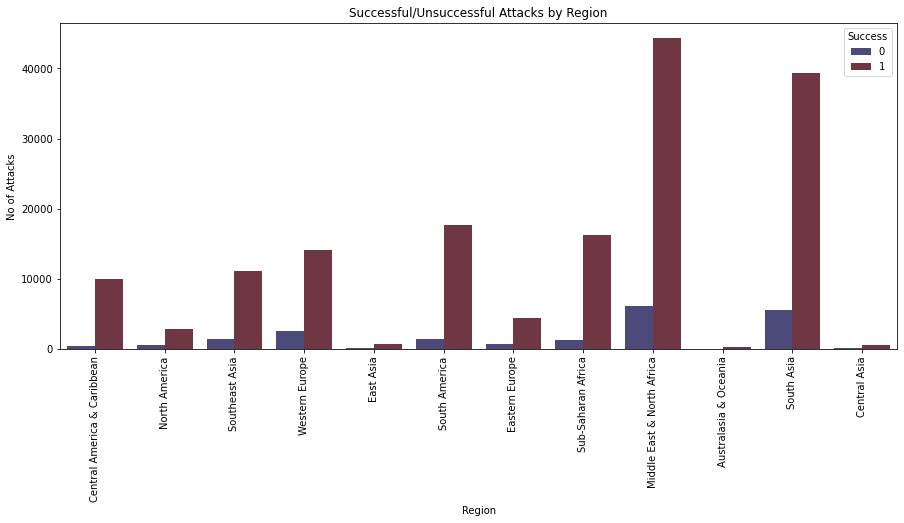

In [172]:
# Attacks by Region
plt.figure(figsize=(15,6))
sns.countplot(x='Region',data=data,hue='Success',palette='icefire',dodge=True)
plt.xticks(rotation=90)
plt.ylabel('No of Attacks')
plt.title('Successful/Unsuccessful Attacks by Region')
plt.show()

In [173]:
# Suicidal/Non-Suicidal attacks by Region
data.groupby(['Region'])['Suicide'].value_counts()

Region                       Suicide
Australasia & Oceania        0            281
                             1              1
Central America & Caribbean  0          10343
                             1              1
Central Asia                 0            552
                             1             11
East Asia                    0            785
                             1             17
Eastern Europe               0           5052
                             1             92
Middle East & North Africa   0          46702
                             1           3772
North America                0           3440
                             1             16
South America                0          18972
                             1              6
South Asia                   0          43048
                             1           1926
Southeast Asia               0          12457
                             1             28
Sub-Saharan Africa           0          168

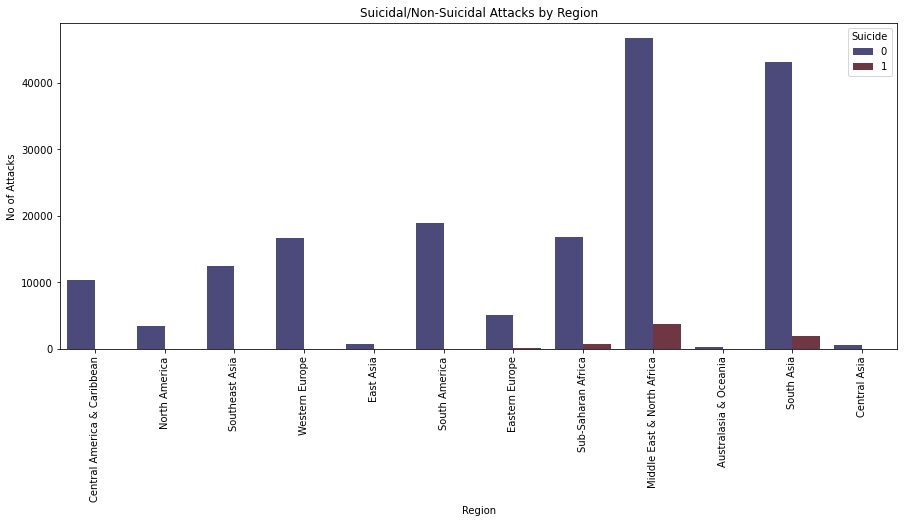

In [174]:
# Suicidal Attacks by Region
plt.figure(figsize=(15,6))
sns.countplot(x='Region',data=data,hue='Suicide',palette='icefire',dodge=True)
plt.xticks(rotation=90)
plt.ylabel('No of Attacks')
plt.title('Suicidal/Non-Suicidal Attacks by Region')
plt.show()

The Maximum number of <b>Attacks</b> happened in <b>Region - Middle East & North Africa</b> with <b>44319 - Successful</b> and <b>6155 - Unsuccessful Attacks</b> and <b>3772</b> were <b>Suicidal Attacks.</b>

### Show Top 10 Cities with maximum attacks? How many Attacks were Successful and Unsuccessful? How many of them were Suicidal Attacks?

In [175]:
# Top 10 Cities with maximum number of attacks
top10_city = data.City.value_counts().sort_values(ascending=False).drop('Unknown').head(10)
top10_city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

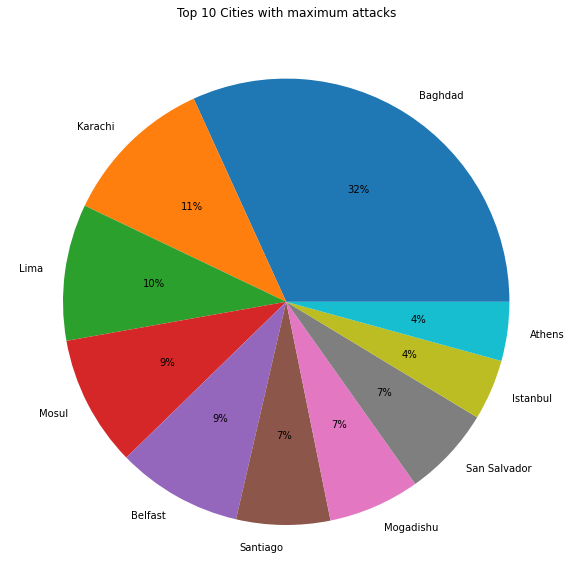

In [176]:
# Top 10 Cities with maximum attacks?
plt.figure(figsize=(10,12))
plt.pie(x=top10_city,labels=top10_city.index,autopct='%.f%%')
plt.title('Top 10 Cities with maximum attacks')
plt.show()

Now we will filter the data according to top 10 cities with maximum attacks.

In [177]:
Top10_City_Data = data[data['City'].isin(top10_city.index)]

In [178]:
#Successful/Unsuccessful attacks on top 10 cities
Top10_City_Data.groupby(['City'])['Success'].value_counts()

City          Success
Athens        1           897
              0           122
Baghdad       1          7226
              0           363
Belfast       1          1797
              0           374
Istanbul      1           935
              0           113
Karachi       1          2428
              0           224
Lima          1          2176
              0           183
Mogadishu     1          1444
              0           137
Mosul         1          1902
              0           363
San Salvador  1          1495
              0            63
Santiago      1          1509
              0           112
Name: Success, dtype: int64

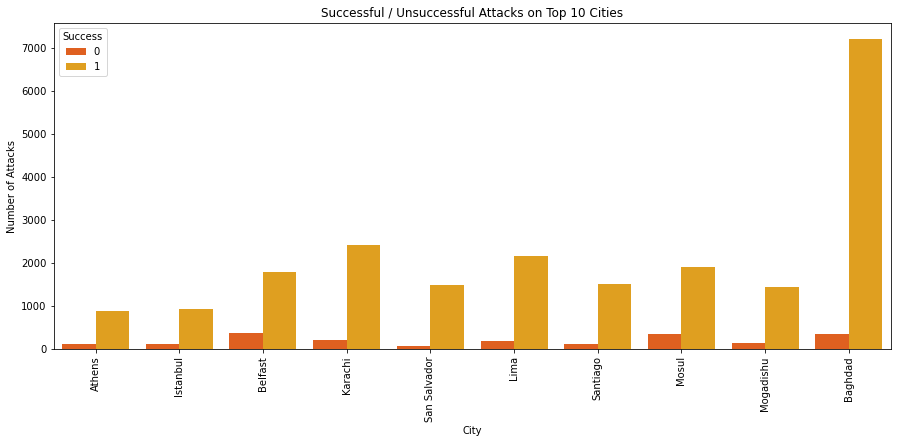

In [179]:
# Successful / Unsuccessful Attacks on Top 10 Cities
plt.figure(figsize=(15,6))
sns.countplot(x='City',data=Top10_City_Data,hue='Success',palette='autumn')
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks')
plt.title('Successful / Unsuccessful Attacks on Top 10 Cities')
plt.show()

In [180]:
# Suicidal/Non-suicidal attacks on top 10 cities
Top10_City_Data.groupby(['City'])['Suicide'].value_counts()

City          Suicide
Athens        0          1019
Baghdad       0          7093
              1           496
Belfast       0          2171
Istanbul      0          1028
              1            20
Karachi       0          2619
              1            33
Lima          0          2359
Mogadishu     0          1467
              1           114
Mosul         0          1965
              1           300
San Salvador  0          1558
Santiago      0          1621
Name: Suicide, dtype: int64

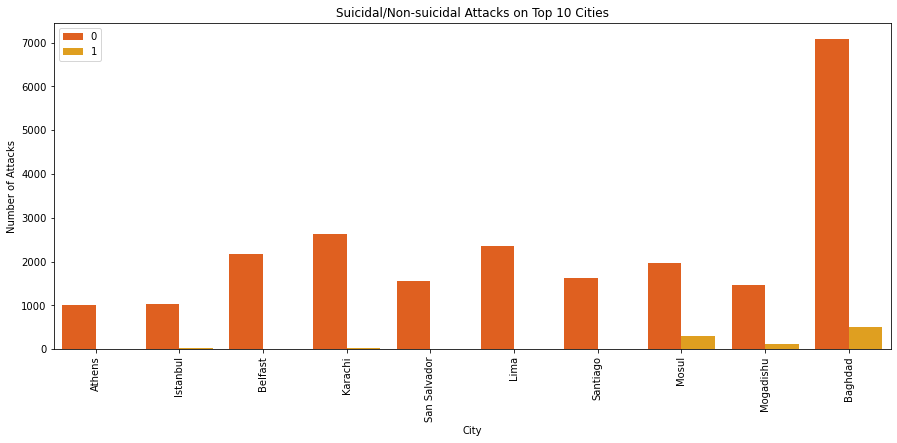

In [181]:
# Suicidal/Non-suicidal Attacks on Top 10 Cities
plt.figure(figsize=(15,6))
sns.countplot(x='City',data=Top10_City_Data,hue='Suicide',palette='autumn')
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks')
plt.legend(loc='upper left')
plt.title('Suicidal/Non-suicidal Attacks on Top 10 Cities')
plt.show()

The maximum number of <b>Attacks</b> happened in the <b>City - Baghdad</b> with <b>7226 - Successful</b> and <b>363 - Unsuccessful Attacks</b> and <b>496</b> were <b>Suicidal Attacks.</b>

### What are different types of Attacks, Target Type and which Group carried out maximum attacks ? 

In [182]:
# Number of Attacks by Attack Type
attack_data=data.Attack_Type.value_counts()
attack_data

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

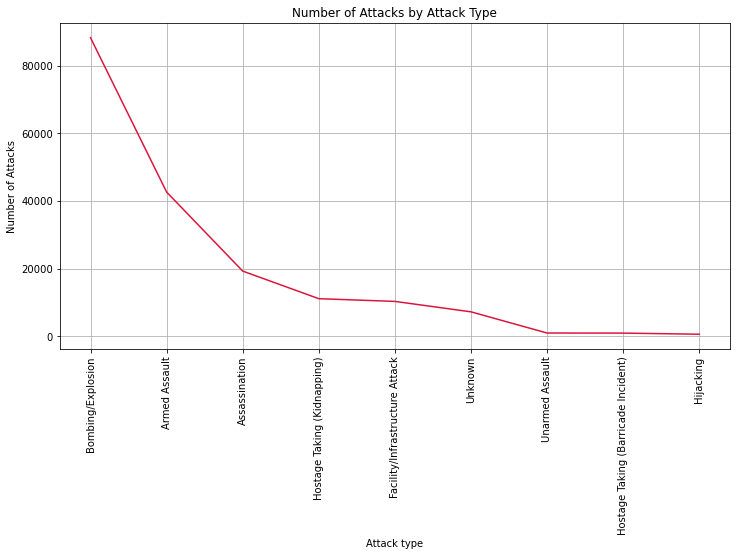

In [183]:
# Number of Attacks by Attack Type
plt.figure(figsize=(12,6))
plt.plot(attack_data.index,attack_data,color='crimson')
plt.xticks(rotation=90)
plt.xlabel('Attack type')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Attack Type')
plt.grid()
plt.show()

In [184]:
# Number of Attacks by Target Type
target_data = data.Target_Type.value_counts()
target_data

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_Type, dtype: int64

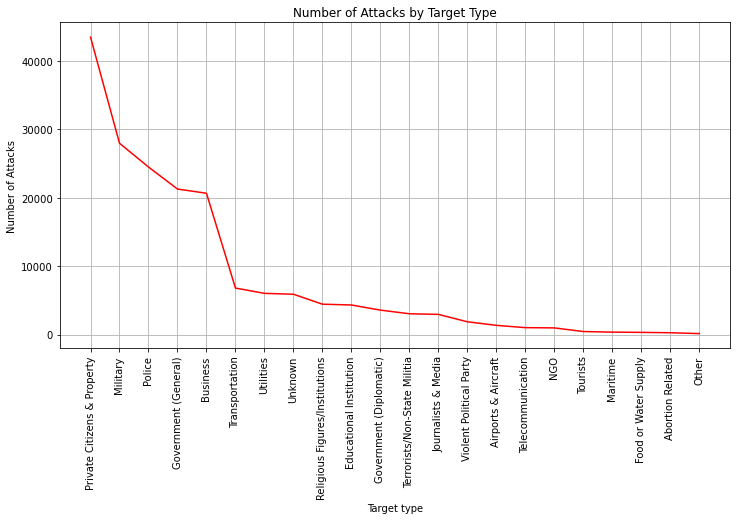

In [185]:
# Number of Attacks by Target Type
plt.figure(figsize=(12,6))
plt.plot(target_data.index,target_data,color='red')
plt.xticks(rotation=90)
plt.xlabel('Target type')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Target Type')
plt.grid()
plt.show()

### Which are the Top 10 terrorist group worldwide?

In [186]:
# Top 10 terrorist group
group_data=data.Attack_Group.value_counts().drop('Unknown').head(10)
group_data

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Attack_Group, dtype: int64

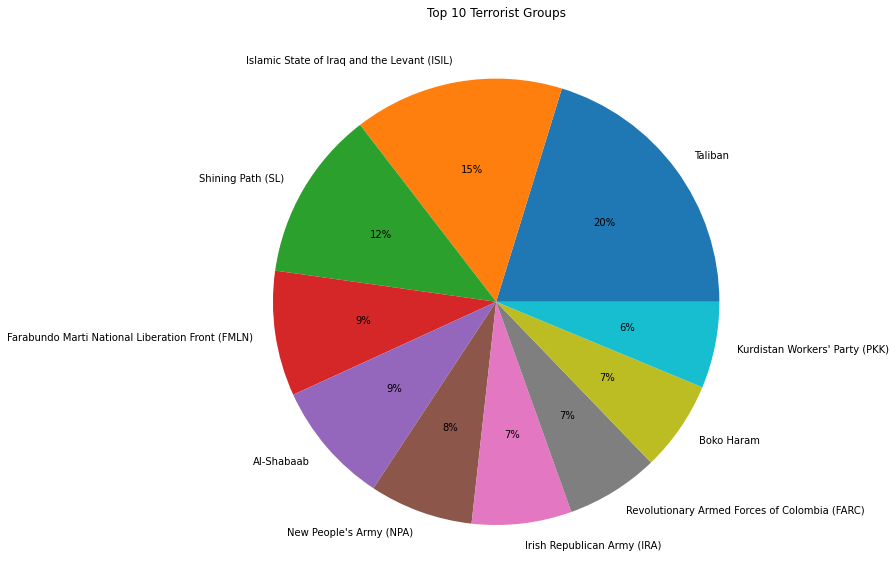

In [187]:
# Top 10 Terrorist Groups
plt.figure(figsize=(10,12))
plt.pie(x=group_data,labels=group_data.index,autopct='%.f%%')
plt.title('Top 10 Terrorist Groups')
plt.show()

From above analysis we can say that the Maximum Attacks are carried out using <b>Bombing/Explosion</b>, maximum times <b>Private Citizens & Property</b> were targeted and out of all the known groups <b>Taliban</b> has carried out maximum Attacks. 

### Now we will Analyse the Attacks on Country - "INDIA".

First we will filter the data with country = 'INDIA'

In [188]:
# extract data related to INDIA
INDIA = data[data['Country'].isin(['India'])]
INDIA.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Attack_Group,Weapon,Collateral
1186,1972,2,22,0,India,South Asia,New Delhi,1,0,Hijacking,Airports & Aircraft,Palestinians,Explosives,0.0
2764,1975,1,2,0,India,South Asia,Samastipur,1,0,Bombing/Explosion,Government (General),Ananda Marga,Explosives,4.0
3857,1976,5,26,0,India,South Asia,New Delhi,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,0.0
5327,1977,9,28,0,India,South Asia,Bombay,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Firearms,0.0
7337,1979,1,13,0,India,South Asia,Unknown,1,0,Armed Assault,Police,Naga People,Firearms,0.0


In [189]:
# Top 10 city where maximum attacks happened
top10_india_city = INDIA.City.value_counts().sort_values(ascending=False).drop('Unknown').head(10)
top10_india_city

Srinagar            658
Imphal              426
New Delhi           157
Amritsar            138
Sopore              102
Ludhiana             77
Guwahati             77
Anantnag             76
Jammu                57
Latehar district     55
Name: City, dtype: int64

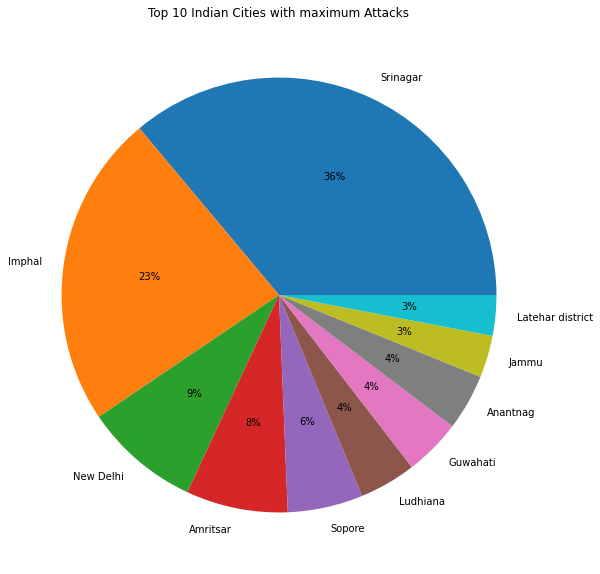

In [190]:
# Top 10 Indian Cities with maximum Attacks
plt.figure(figsize=(12,10))
plt.pie(x=top10_india_city,labels=top10_india_city.index,autopct='%.f%%')
plt.title('Top 10 Indian Cities with maximum Attacks')
plt.show()

Now we will create a data for above ten cities.

In [191]:
Top_INDIA = INDIA[INDIA['City'].isin(top10_india_city.index)]
Top_INDIA.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Attack_Group,Weapon,Collateral
1186,1972,2,22,0,India,South Asia,New Delhi,1,0,Hijacking,Airports & Aircraft,Palestinians,Explosives,0.0
3857,1976,5,26,0,India,South Asia,New Delhi,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,0.0
7342,1979,1,14,0,India,South Asia,Imphal,1,0,Assassination,Government (General),Unknown,Firearms,3.0
9157,1979,8,27,0,India,South Asia,New Delhi,1,0,Armed Assault,Government (General),Mizo National Front,Firearms,2.0
9158,1979,8,27,0,India,South Asia,New Delhi,1,0,Armed Assault,Police,Mizo National Front,Firearms,1.0


In [192]:
# Collateral damage according to top 10 cities in india
Top_INDIA.groupby(['City','Attack_Type'])['Collateral'].sum()

City              Attack_Type                   
Amritsar          Armed Assault                      156.0
                  Assassination                      157.0
                  Bombing/Explosion                  395.0
                  Facility/Infrastructure Attack       0.0
                  Hijacking                            0.0
                  Hostage Taking (Kidnapping)         12.0
                  Unknown                             48.0
Anantnag          Armed Assault                       62.0
                  Assassination                       29.0
                  Bombing/Explosion                  406.0
                  Facility/Infrastructure Attack       0.0
                  Hostage Taking (Kidnapping)          4.0
                  Unarmed Assault                      5.0
Guwahati          Armed Assault                       21.0
                  Assassination                        3.0
                  Bombing/Explosion                  795.0
       

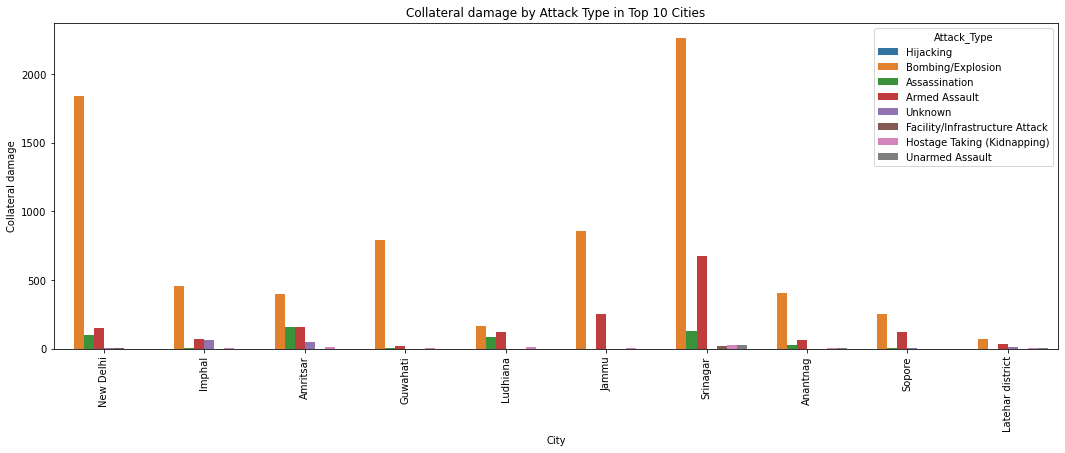

In [193]:
# Collateral damage by Attack Type in Top 10 Cities
plt.figure(figsize=(18,6))
sns.barplot(x='City',y='Collateral',hue='Attack_Type',data=Top_INDIA,ci=None,estimator=np.sum)
plt.xticks(rotation=90)
plt.ylabel('Collateral damage')
plt.title('Collateral damage by Attack Type in Top 10 Cities')
plt.show()

From analysis of above data on Top 10 Cities we can say that the maximum <b>Attacks</b> happened in <b>City - Srinagar</b> where maximum <b>Collateral Damage</b> is caused by <b>Attack_Type - Bombing/Explosion.</b> 

Now we will see who were the target type considering whole INDIA. 

In [194]:
india_target = INDIA.Target_Type.value_counts()
india_target

Private Citizens & Property       3144
Police                            2299
Government (General)              1727
Business                          1131
Military                           916
Transportation                     831
Unknown                            598
Educational Institution            297
Violent Political Party            234
Religious Figures/Institutions     214
Terrorists/Non-State Militia       143
Telecommunication                  139
Journalists & Media                 87
Utilities                           86
Tourists                            30
Airports & Aircraft                 28
NGO                                 20
Government (Diplomatic)             19
Food or Water Supply                12
Maritime                             3
Other                                2
Name: Target_Type, dtype: int64

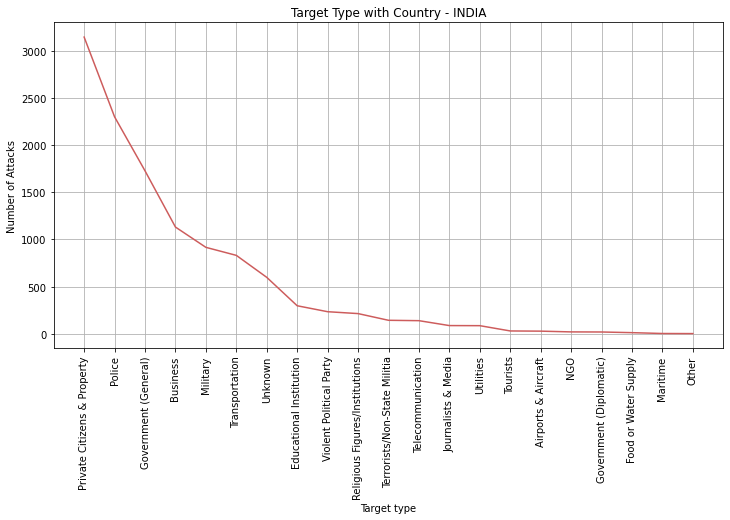

In [195]:
# Target Type with Country - INDIA
plt.figure(figsize=(12,6))
plt.plot(india_target.index,india_target,color='indianred')
plt.xticks(rotation=90)
plt.xlabel('Target type')
plt.ylabel('Number of Attacks')
plt.title('Target Type with Country - INDIA')
plt.grid()
plt.show()

In [196]:
# Top 10 terrorist groups in India
india_group = INDIA.Attack_Group.value_counts().drop('Unknown').head(10)
india_group

Communist Party of India - Maoist (CPI-Maoist)    1877
Maoists                                           1396
Sikh Extremists                                    710
United Liberation Front of Assam (ULFA)            357
Hizbul Mujahideen (HM)                             199
Lashkar-e-Taiba (LeT)                              187
National Democratic Front of Bodoland (NDFB)       174
Garo National Liberation Army                      166
Muslim Separatists                                 118
People's War Group (PWG)                            97
Name: Attack_Group, dtype: int64

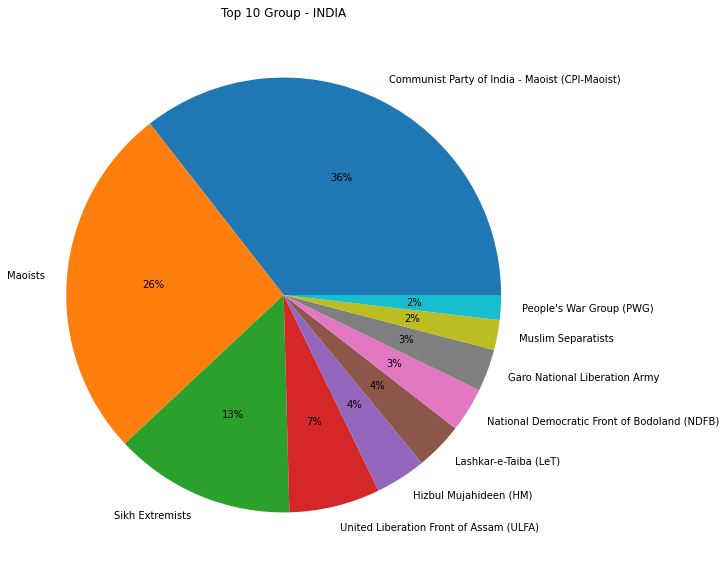

In [197]:
# Top 10 Group
plt.figure(figsize=(12,10))
plt.pie(x=india_group,labels=india_group.index,autopct='%.f%%')
plt.title('Top 10 Group - INDIA')
plt.show()

From above analysis we can say that out of all the target types <b>Private Citizens & Property</b> were mostly targeted by terrorists and <b>Communist Party of India - Maoist (CPI-Maoist)</b> has carried out maximum attacks. 

#### Summary:
   1. The <b>Year - 2014</b> has recorded maximum <b>Attacks - 16903.</b>
   2. The <b>Month - May</b> has recorded maximum <b>Attacks - 16875</b>.
   3. The maximum <b>Attacks</b> happened on <b>1<sup>st</sup></b> and <b>15<sup>th</sup></b> day of the <b>Month.</b>
   4. There were total of <b>161632 - 89% - Successful Attacks</b> and <b>20059 - 11% - Failed Attacks.</b> Out of all the attacks that were happened only <b>6633 - 4%</b> were <b>Suicide Attacks</b> and only <b>8239 - 5% Extended</b> for more than 24 Hrs.
   5. The maximum <b>Attacks</b> happened in the <b>Country- Iraq</b> with <b>21861 - Successful</b> and <b>2775 - Unsuccessful Attacks</b> and out of them <b>2602</b> were <b>Suicidal Attacks.</b>
   6. The Maximum number of <b>Attacks</b> happened in <b>Region - Middle East & North Africa</b> with <b>44319 - Successful</b> and <b>6155 - Unsuccessful Attacks</b> and <b>3772</b> were <b>Suicidal Attacks.</b>
   7. The maximum number of <b>Attacks</b> happened in the <b>City - Baghdad</b> with <b>7226 - Successful</b> and <b>363 - Unsuccessful Attacks</b> and <b>496</b> were <b>Suicidal Attacks.</b>
   8. The Maximum Attacks are carried out using <b>Bombing/Explosion</b>, maximum times <b>Private Citizens & Property</b> were targeted and out of all the known groups <b>Taliban</b> has carried out maximum Attacks.
   9. In INDIA the maximum <b>Attacks</b> happened in <b>City - Srinagar</b> where maximum <b>Collateral Damage</b> is caused by <b>Attack_Type - Bombing/Explosion.</b> 
   10. In INDIA out of all the target types <b>Private Citizens & Property</b> were mostly targeted by terrorists and <b>Communist Party of India - Maoist (CPI-Maoist)</b> has carried out maximum attacks.  